# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
weather_api_key='47e95aa0b4f075cbb3164651c35b7c0a'
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['tiksi',
 'busselton',
 'palmer',
 'fare',
 'taolanaro',
 'upernavik',
 'illoqqortoormiut',
 'bluff',
 'punta arenas',
 'saint-philippe',
 'yellowknife',
 'grand gaube',
 'normandin',
 'ushuaia',
 'rikitea',
 'atuona',
 'albany',
 'akdepe',
 'hofn',
 'almaznyy',
 'zhigansk',
 'salalah',
 'maltahohe',
 'leningradskiy',
 'vaitupu',
 'coihaique',
 'belushya guba',
 'hachinohe',
 'itambe',
 'lompoc',
 'bredasdorp',
 'hilo',
 'tasiilaq',
 'enshi',
 'new norfolk',
 'tazovskiy',
 'vechelde',
 'hermanus',
 'jamestown',
 'klaksvik',
 'carnarvon',
 'umm jarr',
 'sulangan',
 'abalak',
 'souillac',
 'barrow',
 'cherskiy',
 'saint-joseph',
 'iquique',
 'lebu',
 'ankang',
 'meulaboh',
 'pocking',
 'sao filipe',
 'chancay',
 'puerto ayora',
 'kuching',
 'tessalit',
 'banda aceh',
 'adrar',
 'norman wells',
 'houma',
 'qinhuangdao',
 'bako',
 'moga',
 'grand river south east',
 'sitka',
 'hobart',
 'berwick',
 'katsuura',
 'kuminskiy',
 'oistins',
 'chokurdakh',
 'saskylakh']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
temp=[]
humidity=[]
cloudy=[]
wind_speed=[]
date=[]
long=[]
lat=[]
city=[]
for city in cities:
    time.sleep(1)
    print(f'processing {city}')
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" + city
    response = requests.get(url).json()
    try:
        city.append(cities[row])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        long.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])

    except:
        print('skipped this city')
        pass 
    

processing tiksi
processing busselton
processing palmer
processing fare
processing taolanaro
skipped this city
processing upernavik
processing illoqqortoormiut
skipped this city
processing bluff
processing punta arenas
processing saint-philippe
processing yellowknife
processing grand gaube
processing normandin
processing ushuaia
processing rikitea
processing atuona
processing albany
processing akdepe
processing hofn
processing almaznyy
processing zhigansk
processing salalah
processing maltahohe
processing leningradskiy
processing vaitupu
skipped this city
processing coihaique
processing belushya guba
skipped this city
processing hachinohe
processing itambe
processing lompoc
processing bredasdorp
processing hilo
processing tasiilaq
processing enshi
processing new norfolk
processing tazovskiy
processing vechelde
processing hermanus
processing jamestown
processing klaksvik
processing carnarvon
processing umm jarr
skipped this city
processing sulangan
processing abalak
processing souillac


In [11]:
#time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.localtime())

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather={ 'Lat':lat,
         'Lng':long,
         'Max Temp':temp, 
         'Humidity': humidity, 
         'Cloudiness':cloudy, 
         'Wind Speed': wind_speed,
        'Date': date}



In [13]:
weather_df=pd.DataFrame(weather)
weather_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,71.69,128.87,5.43,91,100,13.67,1603722958
1,-33.65,115.33,59.00,69,0,3.49,1603722959
2,42.16,-72.33,48.00,93,90,5.82,1603722960
3,-16.70,-151.02,79.90,76,100,8.86,1603722961
4,72.79,-56.15,16.20,80,75,4.97,1603722794
...,...,...,...,...,...,...,...
63,35.13,140.30,62.60,72,0,10.29,1603723037
64,58.67,66.57,35.13,97,100,11.83,1603723038
65,13.07,-59.53,87.80,70,40,12.75,1603723039
66,70.63,147.92,8.13,96,100,13.24,1603723041


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
weather_df.dtypes

Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Date            int64
dtype: object

In [19]:
weather_clean=weather_df.loc[weather_df['Humidity']>100]
indicies=weather_df.loc[weather_df['Humidity']>100].index

In [20]:
weather_clean

Int64Index([], dtype='int64')

In [34]:
#  Get the indices of cities that have humidity over 100%.
weather_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-46.19,168.86,48.00,73,92,1.99,1603290297
1,49.78,-74.85,32.00,99,90,14.99,1603290439
2,-33.65,115.33,57.00,61,1,12.77,1603290046
3,30.38,67.73,48.70,33,0,4.59,1603290439
4,71.97,102.50,1.00,94,80,2.91,1603290093
...,...,...,...,...,...,...,...
553,38.21,37.20,71.35,29,20,5.88,1603290513
554,-29.14,-59.26,73.51,68,92,10.63,1603290513
555,37.93,102.64,48.51,41,0,2.46,1603290513
556,55.96,92.55,46.40,61,100,6.71,1603290514


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data=weather_df.drop(indicies, inplace='False' ) function of indicies

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

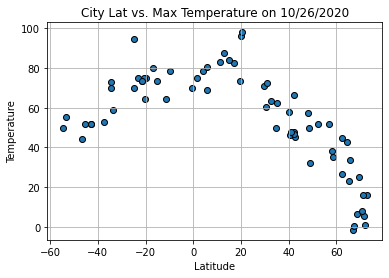

In [40]:
from datetime import datetime
now = datetime.now() # current date and time
date_time = now.strftime("%m/%d/%Y")
plt.scatter(weather_df['Lat'],weather_df['Max Temp'], edgecolors='black')
plt.grid('True')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title(f'City Lat vs. Max Temperature on {date_time}')
plt.savefig('../output_data/temp_plot.png')

#time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.localtime())

## Latitude vs. Humidity Plot

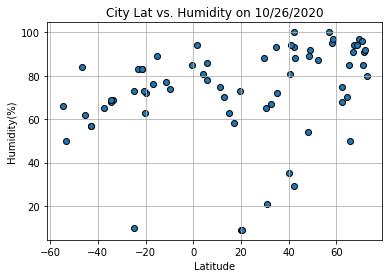

In [41]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'], edgecolors='black')
plt.grid('True')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title(f'City Lat vs. Humidity on {date_time}')
plt.savefig('../output_data/humidity_plot.png')

## Latitude vs. Cloudiness Plot

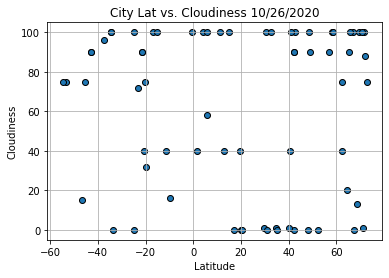

In [42]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], edgecolors='black')
plt.grid('True')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Lat vs. Cloudiness {date_time}')
plt.savefig('../output_data/cloudiness_plot.png')

## Latitude vs. Wind Speed Plot

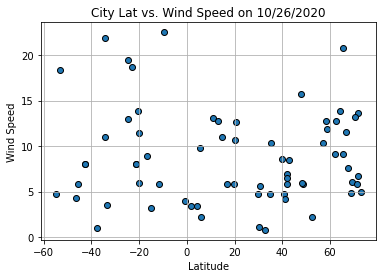

In [43]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], edgecolors='black')
plt.grid('True')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title(f'City Lat vs. Wind Speed on {date_time}')
plt.savefig('../output_data/wind_speed_plot.png')

## Linear Regression

In [55]:
#desert 
#plt.annotate()
northern=weather_df.loc[weather_df['Lat']>0].astype('float')
sourhtern=weather_df.loc[weather_df['Lat']<=0]

def lr(x,y):
    (slope, intercept, rvalue)= linregress(x,y)
    regress_values= x * slope + intercept
    line_eq= 'y = ' + str(round(slope, 2)) + 'x' +str(round(intercept, 2))
    plt.scatter(x,y)
    plt.annotate(line_eq, fontsize=15)
northern

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,71.69,128.87,5.43,91.0,100.0,13.67,1.603723e+09
2,42.16,-72.33,48.00,93.0,90.0,5.82,1.603723e+09
4,72.79,-56.15,16.20,80.0,75.0,4.97,1.603723e+09
8,62.46,-114.35,26.60,68.0,75.0,12.75,1.603723e+09
10,48.83,-72.53,32.00,92.0,90.0,5.82,1.603723e+09
14,42.60,-73.97,45.00,88.0,100.0,8.46,1.603723e+09
15,42.06,59.38,66.20,29.0,0.0,6.93,1.603723e+09
16,64.25,-15.21,42.80,70.0,20.0,13.87,1.603723e+09
17,48.04,40.05,57.20,54.0,0.0,15.66,1.603723e+09
18,66.77,123.37,-1.62,91.0,100.0,11.50,1.603723e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

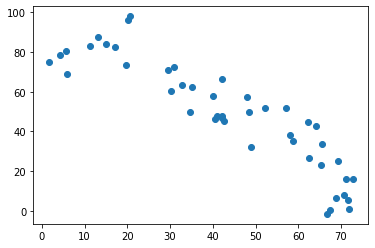

In [72]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'].astype(float), northern['Max Temp'].astype(float))
regress_values= northern['Lat'].astype(float) * slope + intercept
line_eq= 'y = ' + str(round(slope, 2)) + 'x' +str(round(intercept, 2))
plt.scatter(northern['Lat'], northern['Max Temp'])
# plt.annotate(line_eq, northern['Lat'].astype(float), northern['Max Temp'].astype(float),fontsize=15)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


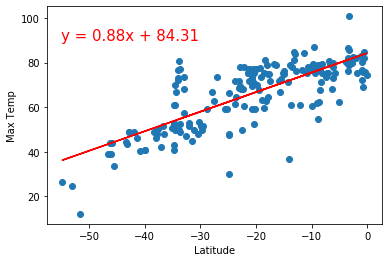

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


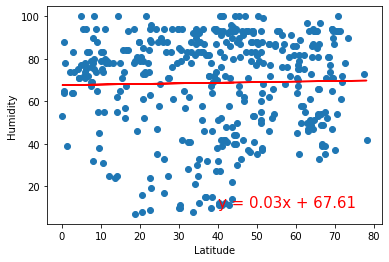

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


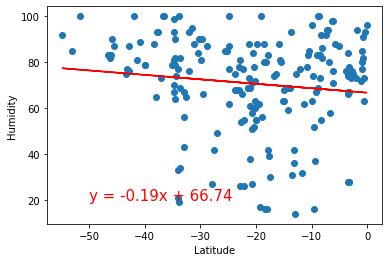

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


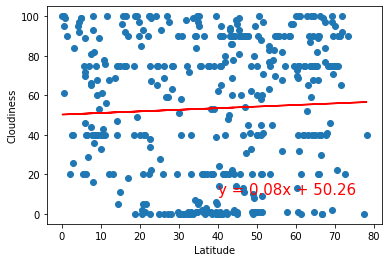

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


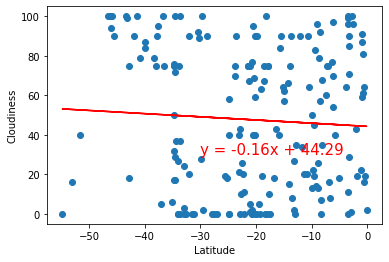

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


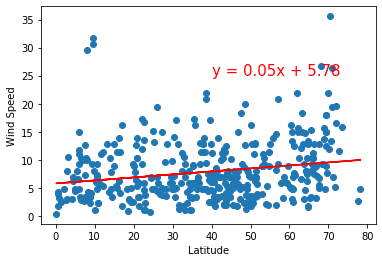

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


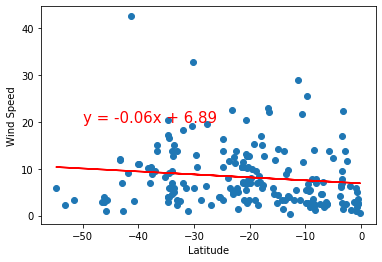